<a href="https://colab.research.google.com/github/menahaha/predictionmodels/blob/main/weatherfore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
dataset = pd.read_csv('/content/GlobalTemperatures.csv')
print(dataset.shape)
print(dataset.info())
print(dataset.columns)
print(dataset.isnull().sum())

(3192, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB
None
Index(['dt', 'LandAverageTemperat

data prep

In [24]:
def wrangle(df):
  df = df.copy()
  df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                        "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
  df["dt"] = pd.to_datetime(df["dt"])
  df = df.dropna(subset = ["LandAverageTemperature"])
  return df



In [26]:
prepped_df = wrangle(dataset)
prepped_df.info()
prepped_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   dt                              3180 non-null   datetime64[ns]
 1   LandAverageTemperature          3180 non-null   float64       
 2   LandMaxTemperature              1992 non-null   float64       
 3   LandMinTemperature              1992 non-null   float64       
 4   LandAndOceanAverageTemperature  1992 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.1 KB


,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN,NaN,NaN
1,1750-02-01,3.083,NaN,NaN,NaN
2,1750-03-01,5.626,NaN,NaN,NaN
3,1750-04-01,8.490,NaN,NaN,NaN
4,1750-05-01,11.573,NaN,NaN,NaN


In [27]:
prepped_df["Year"] = prepped_df["dt"].dt.year
prepped_df["Month"] = prepped_df["dt"].dt.month

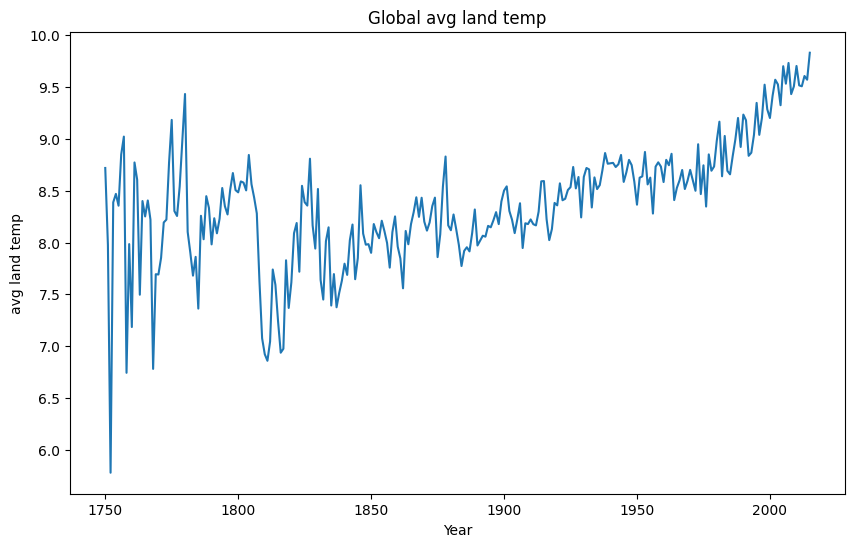

In [33]:
import matplotlib.pyplot as plt
year_avg = prepped_df.groupby("Year")["LandAverageTemperature"].mean()
plt.figure(figsize=(10,6))
plt.plot(year_avg)
plt.xlabel("Year")
plt.ylabel("avg land temp")
plt.title("Global avg land temp")
plt.show()


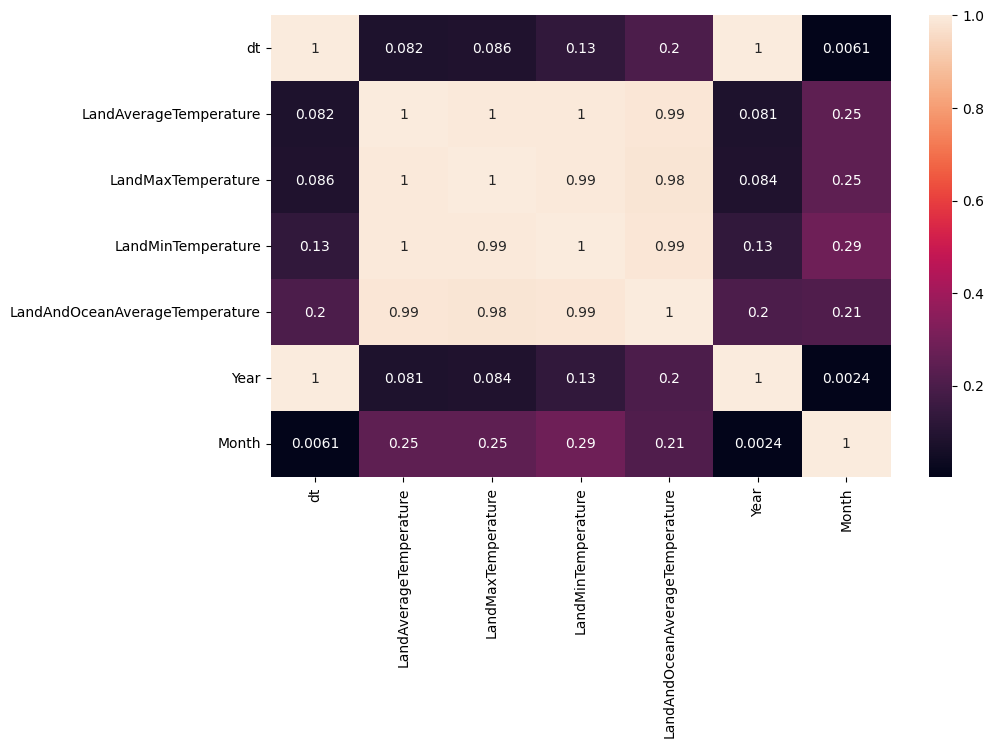

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(prepped_df.corr(), annot=True)
plt.show()


prediction ananlysis

In [39]:
X= prepped_df[["Year", "Month"]]
Y= prepped_df["LandAverageTemperature"]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle = False)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [46]:
Y_pred = model.predict(X_test)


In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


MSE: 16.314788843098796
RMSE: 4.039156947074327


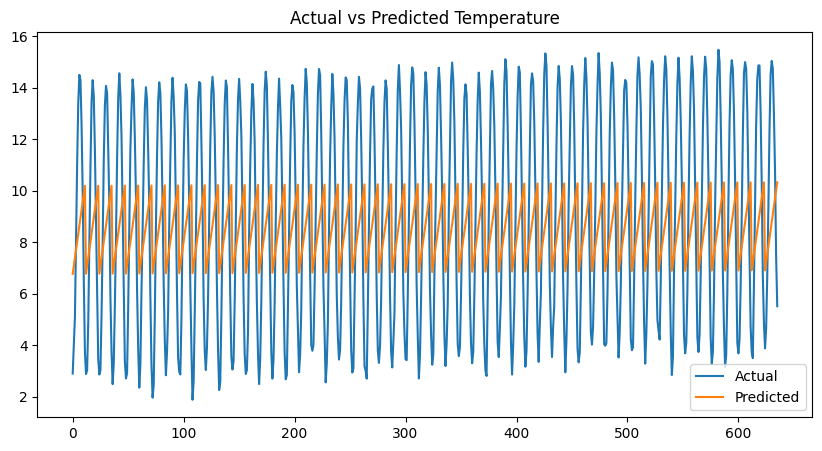

In [51]:

plt.figure(figsize=(10,5))
plt.plot(Y_test.values, label="Actual")
plt.plot(Y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Temperature")
plt.show()
